In [4]:
import pandas as pd
import numpy as np

filepath = "./dataset/dataset/Iris.csv"
df = pd.read_csv(filepath, sep=",")
# print(df)

df["Species"] = df["Species"].map(
    {"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3}
)

print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        1
1      2            4.9           3.0            1.4           0.2        1
2      3            4.7           3.2            1.3           0.2        1
3      4            4.6           3.1            1.5           0.2        1
4      5            5.0           3.6            1.4           0.2        1
..   ...            ...           ...            ...           ...      ...
145  146            6.7           3.0            5.2           2.3        3
146  147            6.3           2.5            5.0           1.9        3
147  148            6.5           3.0            5.2           2.0        3
148  149            6.2           3.4            5.4           2.3        3
149  150            5.9           3.0            5.1           1.8        3

[150 rows x 6 columns]


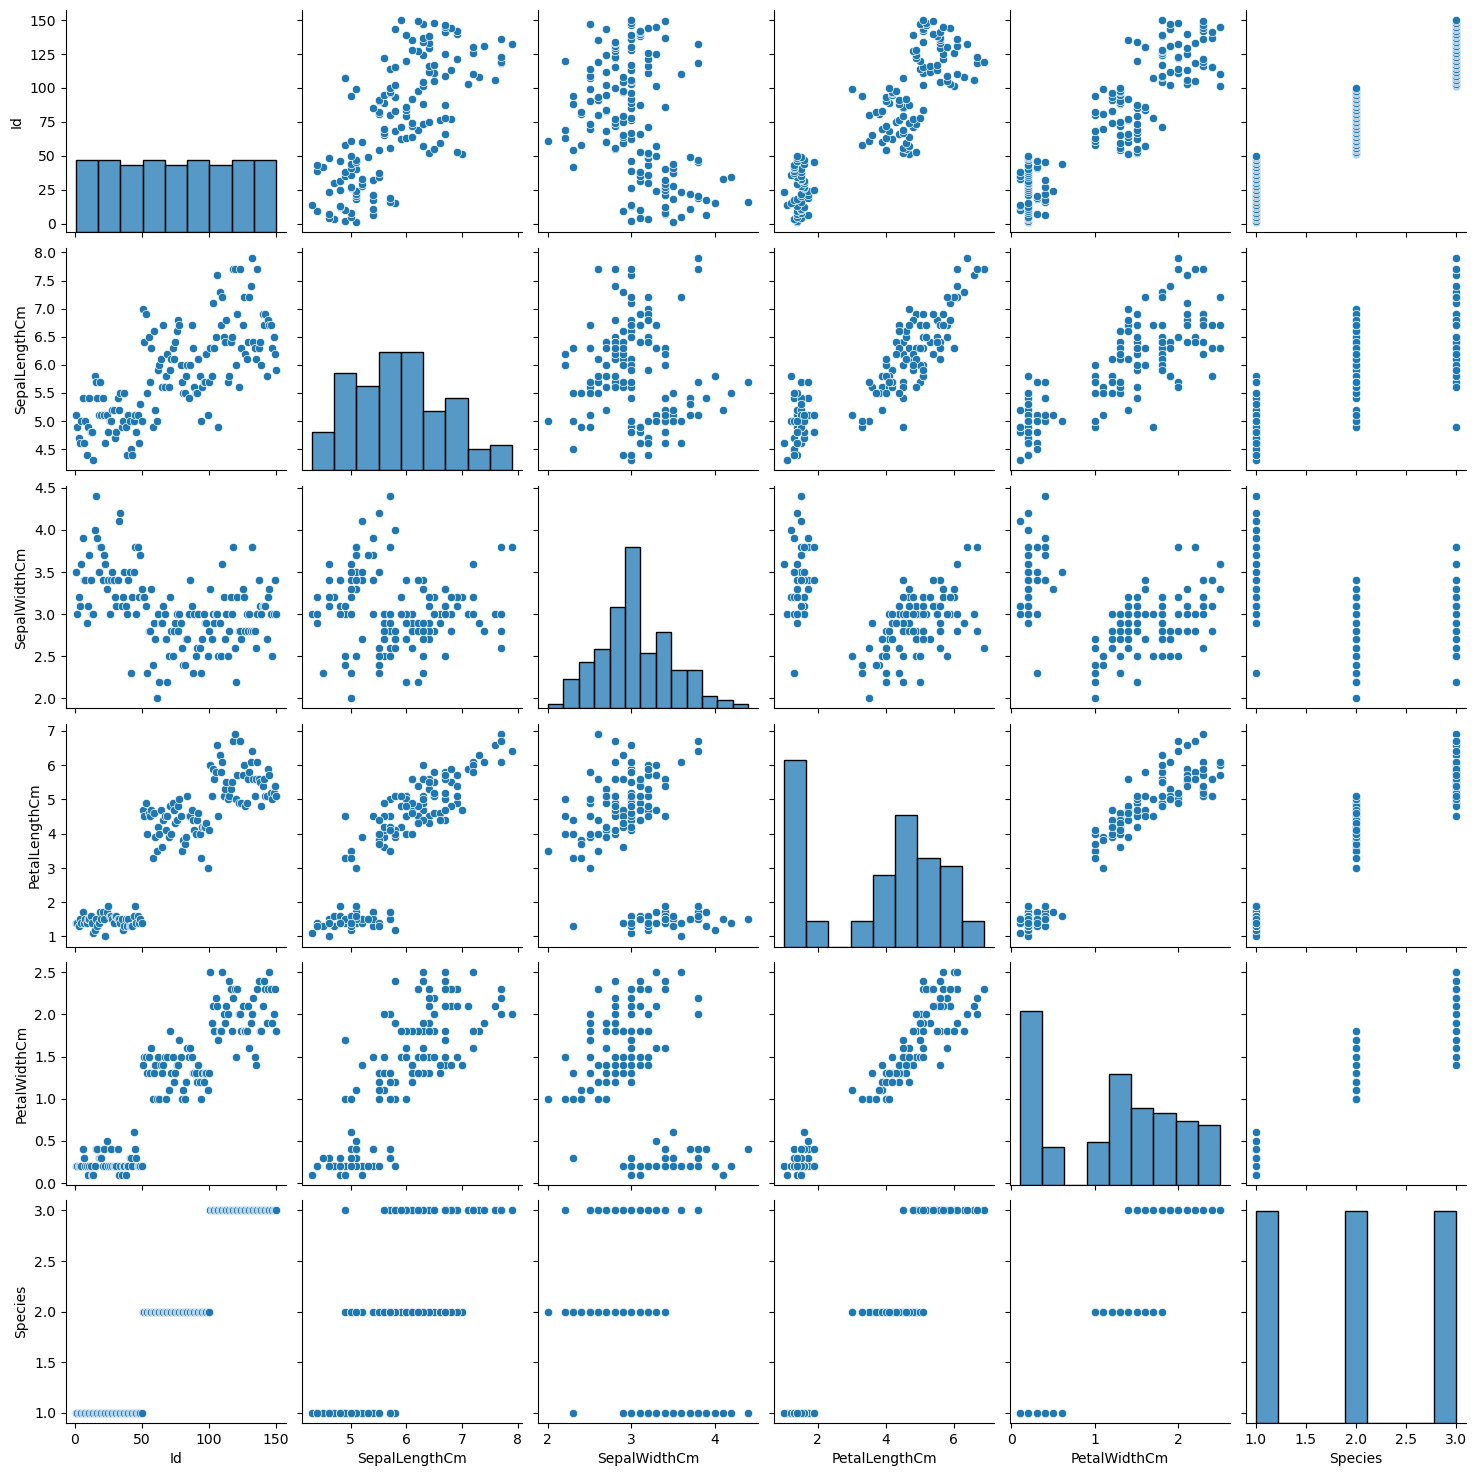

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

In [24]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split


class mydata(Dataset):
    def __init__(self, x_data, y_data):
        self.x_data = torch.tensor(x_data, dtype=torch.float32)
        self.y_data = torch.tensor(y_data, dtype=torch.float32).view(-1, 1)

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return len(self.x_data)


data = df.to_numpy()
x_data = data[:, 1:-1]
y_data = data[:, -1]
print(x_data)
print(y_data)

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42
)

train_data = mydata(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=4, shuffle=True)

test_data = mydata(x_test, y_test)
test_loader = DataLoader(test_data, batch_size=4, shuffle=True)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [7]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import pandas as pd


class mydata(Dataset):
    def __init__(self, x_data, y_data):
        # self.x_data = torch.tensor(x_data, dtype=torch.float32)
        self.x_data = torch.tensor(x_data, dtype=torch.float32)
        self.y_data = torch.tensor(y_data, dtype=torch.long)

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return len(self.x_data)


filepath = "./dataset/dataset/Iris.csv"
df = pd.read_csv(filepath, sep=",")
# print(df)

df["Species"] = df["Species"].map(
    {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
)

print(df)
# 转换数据为numpy格式
data = df.to_numpy()
x_data = data[:, 1:-1]
y_data = data[:, -1]

# 训练集/测试集划分
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42
)

# 创建DataLoader
train_data = mydata(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)

test_data = mydata(x_test, y_test)
test_loader = DataLoader(test_data, batch_size=16, shuffle=True)


class IrisModel(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(IrisModel, self).__init__()
        self.l1 = torch.nn.Linear(input_dim, 8)
        self.l2 = torch.nn.Linear(8, output_dim)

    def forward(self, x):
        x = F.relu(self.l1(x))
        return self.l2(x)


# 假设输入特征是4维，输出是3个类别
input_dim = 4
output_dim = 3
model = IrisModel(input_dim, output_dim)


# 损失函数
criterion = torch.nn.CrossEntropyLoss()

# 优化器
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 训练循环
epochs = 100
for epoch in range(epochs):
    model.train()  # 切换为训练模式
    loss_sum = 0
    correct = 0
    total = 0
    for inputs, targets in train_loader:
        # 前向传播
        y_pred = model(inputs)

        # 计算损失
        loss = criterion(y_pred, targets)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_sum += loss.item()

        # 计算训练准确率
        _, predicted = torch.max(y_pred, 1)
        correct += (predicted == targets).sum().item()
        total += targets.size(0)

    # 打印信息
    if epoch % 10 == 0:
        accuracy = 100 * correct / total
        print(
            f"Epoch [{epoch}/{epochs}], Loss: {loss_sum/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%"
        )


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        0
1      2            4.9           3.0            1.4           0.2        0
2      3            4.7           3.2            1.3           0.2        0
3      4            4.6           3.1            1.5           0.2        0
4      5            5.0           3.6            1.4           0.2        0
..   ...            ...           ...            ...           ...      ...
145  146            6.7           3.0            5.2           2.3        2
146  147            6.3           2.5            5.0           1.9        2
147  148            6.5           3.0            5.2           2.0        2
148  149            6.2           3.4            5.4           2.3        2
149  150            5.9           3.0            5.1           1.8        2

[150 rows x 6 columns]
Epoch [0/100], Loss: 1.1336, Accuracy: 34.17%
Epoch [10/100], Lo

In [1]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import pandas as pd


# 定义 Dataset 类
class MyData(Dataset):
    def __init__(self, x_data, y_data):
        self.x_data = torch.tensor(x_data, dtype=torch.float32)
        self.y_data = torch.tensor(
            y_data, dtype=torch.long
        )  # CrossEntropyLoss 需要 long 类型

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return len(self.x_data)


# 加载和预处理数据
filepath = "./dataset/dataset/Iris.csv"
df = pd.read_csv(filepath, sep=",")
print("原始数据:")
print(df.head())

# 假设第一列是 ID，跳过它；最后一列是标签
# 如果不是，请根据实际数据调整列索引
x_data = df.iloc[:, 1:-1].values  # 跳过第一列（ID）和最后一列（Species）
y_data = (
    df.iloc[:, -1]
    .map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})
    .values
)

print("\n处理后的特征 (x_data):")
print(x_data[:5])
print("\n处理后的标签 (y_data):")
print(y_data[:5])

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

# 创建 DataLoader
train_data = MyData(x_train, y_train)
train_loader = DataLoader(
    train_data, batch_size=16, shuffle=True
)  # 增加 batch_size 以加快训练

test_data = MyData(x_test, y_test)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

# 检查是否有可用的 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\n使用的设备: {device}")


# 定义模型
class IrisModel(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(IrisModel, self).__init__()
        self.l1 = torch.nn.Linear(input_dim, 8)  # 隐藏层有 8 个神经元
        self.l2 = torch.nn.Linear(8, output_dim)  # 输出层有 3 个神经元（3 类）

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        return x


# 确认输入特征数量
input_dim = x_train.shape[1]  # 应该是 4
output_dim = 3  # Iris 数据集有 3 个类别
print(f"\n输入维度: {input_dim}, 输出维度: {output_dim}")

# 初始化模型并迁移到设备
model = IrisModel(input_dim, output_dim).to(device)

# 定义损失函数和优化器
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 训练循环
epochs = 100
for epoch in range(epochs):
    model.train()  # 切换到训练模式
    loss_sum = 0
    correct = 0
    total = 0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        # 前向传播
        outputs = model(inputs)

        # 计算损失
        loss = criterion(outputs, targets)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_sum += loss.item()

        # 计算准确率
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == targets).sum().item()
        total += targets.size(0)

    # 每隔10个 epoch 打印一次
    if (epoch + 1) % 10 == 0:
        accuracy = 100 * correct / total
        avg_loss = loss_sum / len(train_loader)
        print(
            f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%"
        )

# 测试模型
model.eval()  # 切换到评估模式
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == targets).sum().item()
        total += targets.size(0)
    test_accuracy = 100 * correct / total
    print(f"\n测试集准确率: {test_accuracy:.2f}%")

原始数据:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

处理后的特征 (x_data):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

处理后的标签 (y_data):
[0 0 0 0 0]

使用的设备: cuda

输入维度: 4, 输出维度: 3
Epoch [10/100], Loss: 0.6427, Accuracy: 70.83%
Epoch [20/100], Loss: 0.5082, Accuracy: 80.83%
Epoch [30/100], Loss: 0.4290, Accuracy: 89.17%
Epoch [40/100], Loss: 0.3886, Accuracy: 96.67%
Epoch [50/100], Loss: 0.3421, Accuracy: 93.33%
Epoch [60/100], Loss: 0.3164, Accuracy: 96.67%
Epoch [70/100], Loss: 0.2744, Accuracy: 96.67%
Epoch [80/100], Loss: 0.2453